# TITANIC

### Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Dataset

### Cargar base de datos

In [45]:
data = pd.read_csv("D:/DATASET/titanic.csv")
data_main = data.copy()    #Copia original 

### Dimensiones

In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.shape

(891, 12)

 >  891 Personas 
 
 > 12 variables

In [51]:
n = data.shape[1]       #Numero de pasajeros

# Descripción de los datos

### Tipos de variables 

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


> 5 Variables categóricas 

> 7 Variables cuantitativas

### Valores nulos 

In [19]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Hay 3 variables con valores nulos; en Edad Cabin y Embarked

In [32]:
data.Cabin.unique()        #Observar valores únicos de la variable "Cabin"

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [46]:
data.drop("Cabin", axis=True, inplace=True)

Dado que no se posee mayor información del código de cabina y al alto numero de NAs se puede prescindir de esta variable

In [30]:
data.Embarked.unique()          #Observar valores únicos de la variable "Embarked"

array(['S', 'C', 'Q', nan], dtype=object)

- La variable Embarked en cambio posee solo 3 zonas donde embarcaron los pasajeros, por lo cual si puede ser de utilidad. Solo existen dos valores nulos luego podrán eliminarse directamente o rellenar con most comount value

In [29]:
data.Embarked.value_counts()          #Observar la frecuencia de valores nulos de la variable "Embarked"

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Dado que es una variable bastante desbalanceada se cambiarán los valores nulos por el más comun "S"

In [47]:
data["Embarked"].fillna("S", inplace=True)      #Rellenar valores nulos con "S"

### Tipos de datos en cada variable 

In [42]:
#Mostrar valores únicos de cada columna
data.apply(lambda x: pd.Series(pd.unique(x))).fillna('').head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,0,1,PC 17599,71.2833,C
2,3,,2,"Heikkinen, Miss. Laina",,26,3,2,STON/O2. 3101282,7.925,Q
3,4,,,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",,35,4,5,113803,53.1,
4,5,,,"Allen, Mr. William Henry",,,2,3,373450,8.05,


>  La variable "Passengerid es similar al index, luego también puede eliminarse

> La variable "Ticket" y "Name" no aportan información, se elimina.

In [48]:
data.drop(["PassengerId","Ticket","Name"], axis=1, inplace=True)  #Borrar columnas PassengerId, Ticket, Name

- Eliminando columnas innecesarias la base de datos se reduce a 8 variables:

In [49]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Distribución de los datos 

### Supervivientes

0    549
1    342
Name: Survived, dtype: int64

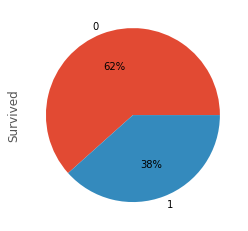

In [56]:
X1 = data.Survived
X1.value_counts().plot.pie(autopct='%1.0f%%');
plt.style.use("ggplot")
X1.value_counts()

> Sobrevivien 342 personas, el 38% de los pasajeros

### Supervivientes y Sexo

In [97]:
pd.crosstab(data.Survived, data.Sex, normalize=1)    # Tabla de frecuencias con porcentajes

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


In [96]:
data.Sex.value_counts()             # Frecuencias de variable Sexo

male      577
female    314
Name: Sex, dtype: int64

>  Habian 577 hombres y 314 mujeres en el barco

> Sobrevivien el 74,2% de las mujeres mientras que  solo el 18,8 % de los hombres

### Supervivientes y Edad

### Supervivientes y Clase / Fare

## Descripción de los datos 

In [124]:
df0.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Valores nulos en Age 

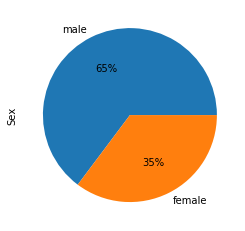

In [125]:
#Sex
Age = df0["Sex"]
Age.value_counts().plot.pie(autopct='%1.0f%%')

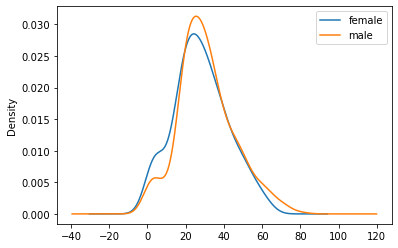

In [11]:
#Age and Sex
g = df0.groupby("Sex").Age
g.plot(kind="kde")
plt.legend()

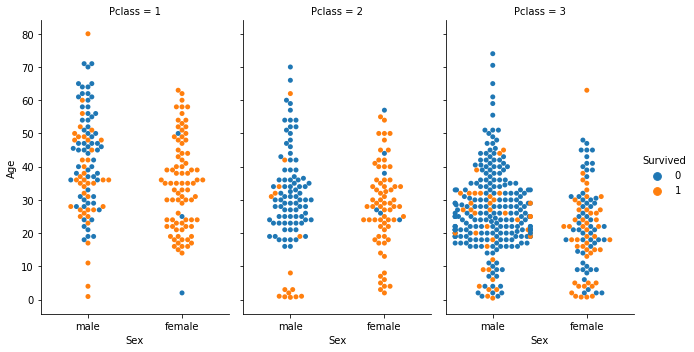

In [28]:
#Pclass-Sex-Age-Survived
sns.catplot(data=df0,x="Sex", y="Age", hue="Survived",
            col="Pclass", aspect=.6,
            kind="swarm")

- Se salvan mas mujeres que hombres, sobre todo en primera y segunda clase 

- La edad parece influir en salvarse, pero aumenta su importancia solo a medida que se baja de clase 

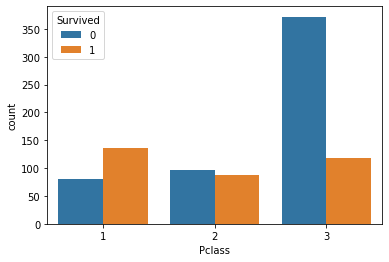

In [20]:
#Pclass -Survived
sns.countplot(data=df0,x='Pclass', hue='Survived')

- Claramente hay mas posibilidades de salvarse según estés en una clase u otra 

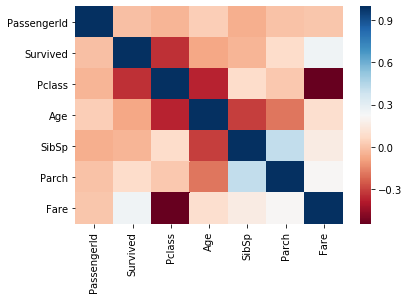

In [126]:
sns.heatmap(df0.corr(), cmap="RdBu")

- Se observa la relación fuerte entre sobrevivir y la clase

- Relación entre Edad y Clase

# MODELO: Predecir supervivientes

## Pre-procesado de datos

In [154]:
#Eliminar columnas que no son utiles 
df = df0.drop(["Name", "Ticket","Cabin","PassengerId"], axis=1)

In [135]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S


In [155]:
#Eliminar NAs
df = df.dropna()

In [157]:
#Variables dependientes e independientes
X = df.drop("Survived",axis=1)
Y = df["Survived"]

X_columns = X.columns

In [158]:
# Codificar datos categóricos
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder_X = LabelEncoder()
X["Embarked"] = labelencoder_X.fit_transform(X["Embarked"])
X["Sex"] = labelencoder_X.fit_transform(X["Sex"])

In [159]:
# Escalado de variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [160]:
# Dividir el data set en conjunto de entrenamiento y conjunto de testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

## REGRESIÓN LOGÍSTICA 

In [161]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

0.8172690763052208

In [162]:
#Pesos de las variables 
pd.Series(logreg.coef_[0])

0   -1.002232
1   -1.284180
2   -0.677921
3   -0.478602
4   -0.013237
5    0.173130
6   -0.136120
dtype: float64

In [163]:
#Pesos de cada variable 
Variables = pd.DataFrame(X_columns)
Variables.columns = ['Variables']
Variables["Peso"]=logreg.coef_[0]
Variables

,Variables,Peso
0,Pclass,-1.002232
1,Sex,-1.284180
2,Age,-0.677921
3,SibSp,-0.478602
4,Parch,-0.013237
5,Fare,0.173130
6,Embarked,-0.136120


In [164]:
#Probar con otros datos 
#Propar con otros datos 
P = pd.DataFrame(columns=X_columns)
datos_prueba=[3,1,23,0,0,35,1]
P.loc[len(P)]=datos_prueba
P

Y_P = logreg.predict(P)
Y_P

array([0], dtype=int64)

## ARBOL DE DECISIÓN 

In [166]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier


random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

0.9939759036144579

In [167]:
pd.DataFrame(columns=X_columns)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [168]:
#Propar con otros datos 
P = pd.DataFrame(columns=X_columns)
datos_prueba=[1,1,23,0,0,35,1]
P.loc[len(P)]=datos_prueba
P

Y_P = random_forest.predict(P)
Y_P

array([0], dtype=int64)